   # Cancer Prediction

"Importing the required libraries & packages"

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pickle
import warnings
warnings.filterwarnings('ignore')

"Changing The Default Working Directory Path 
&
Reading the Dataset using Pandas Command"

In [2]:
os.chdir('C:\\Users\\Shridhar\\OneDrive\\Desktop\\Top Mentor\\Batch 74 Day 31\\Project to Explain Classifciation')
df=pd.read_csv('data.csv')

"Checking the Null values of all the columns in the dataset."

In [3]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

"Getting the unique value and its counts in the Diagnosis Column from the dataset"

In [4]:
df.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

"Label Encoding the Diagnosis Column from the dataset."

In [5]:
df['diagnosis']=df['diagnosis'].astype('category')
df['diagnosis']=df['diagnosis'].cat.codes

"Assigning the dependent and independent variable."

In [6]:
x=df.drop(['id','diagnosis'],axis=1)
y=df['diagnosis']

"Getting the Correlation Values from all the numeric columns from the independent variable using Seaborn Heatmap & saving the PNG File"

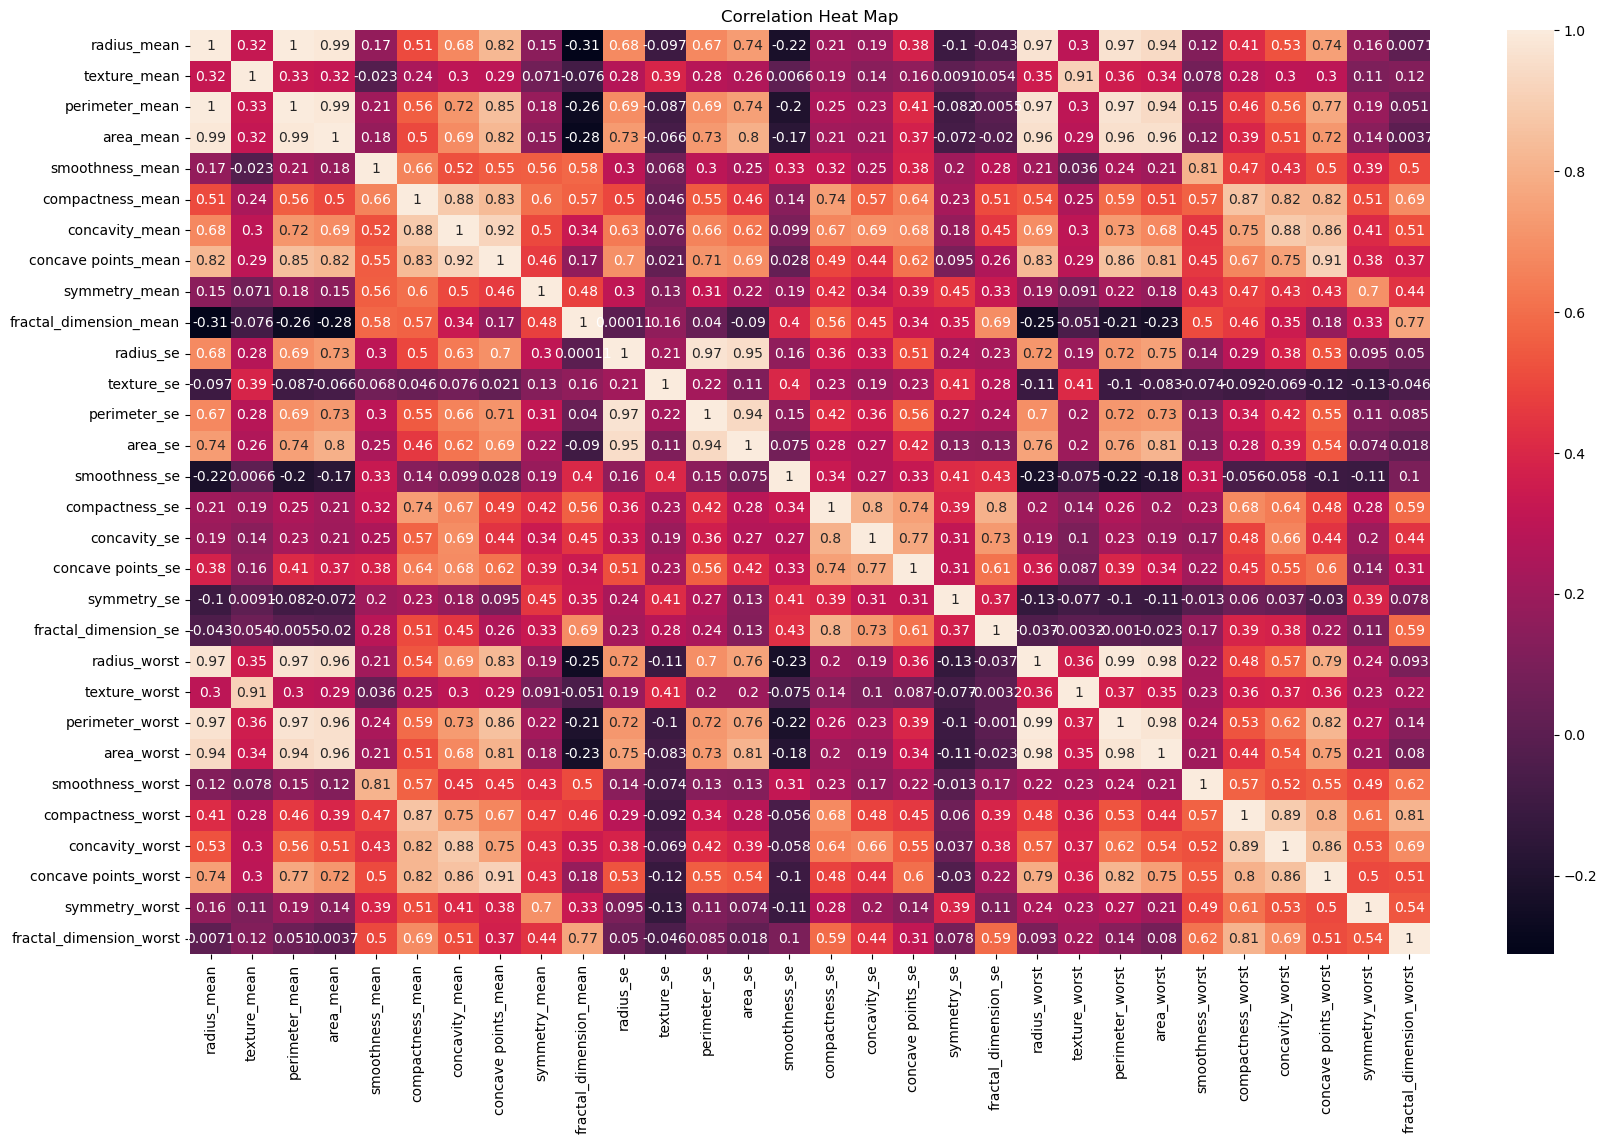

In [7]:
plt.rcParams['figure.figsize']=20,12
sns.heatmap(x.corr(),annot=True)
plt.title('Correlation Heat Map')
plt.savefig('Correlation Heat Map.png')
plt.show()

"Checking the Outliers of all the columns of the independent variable using Seaborn Box Plot in the following 6 Cells"

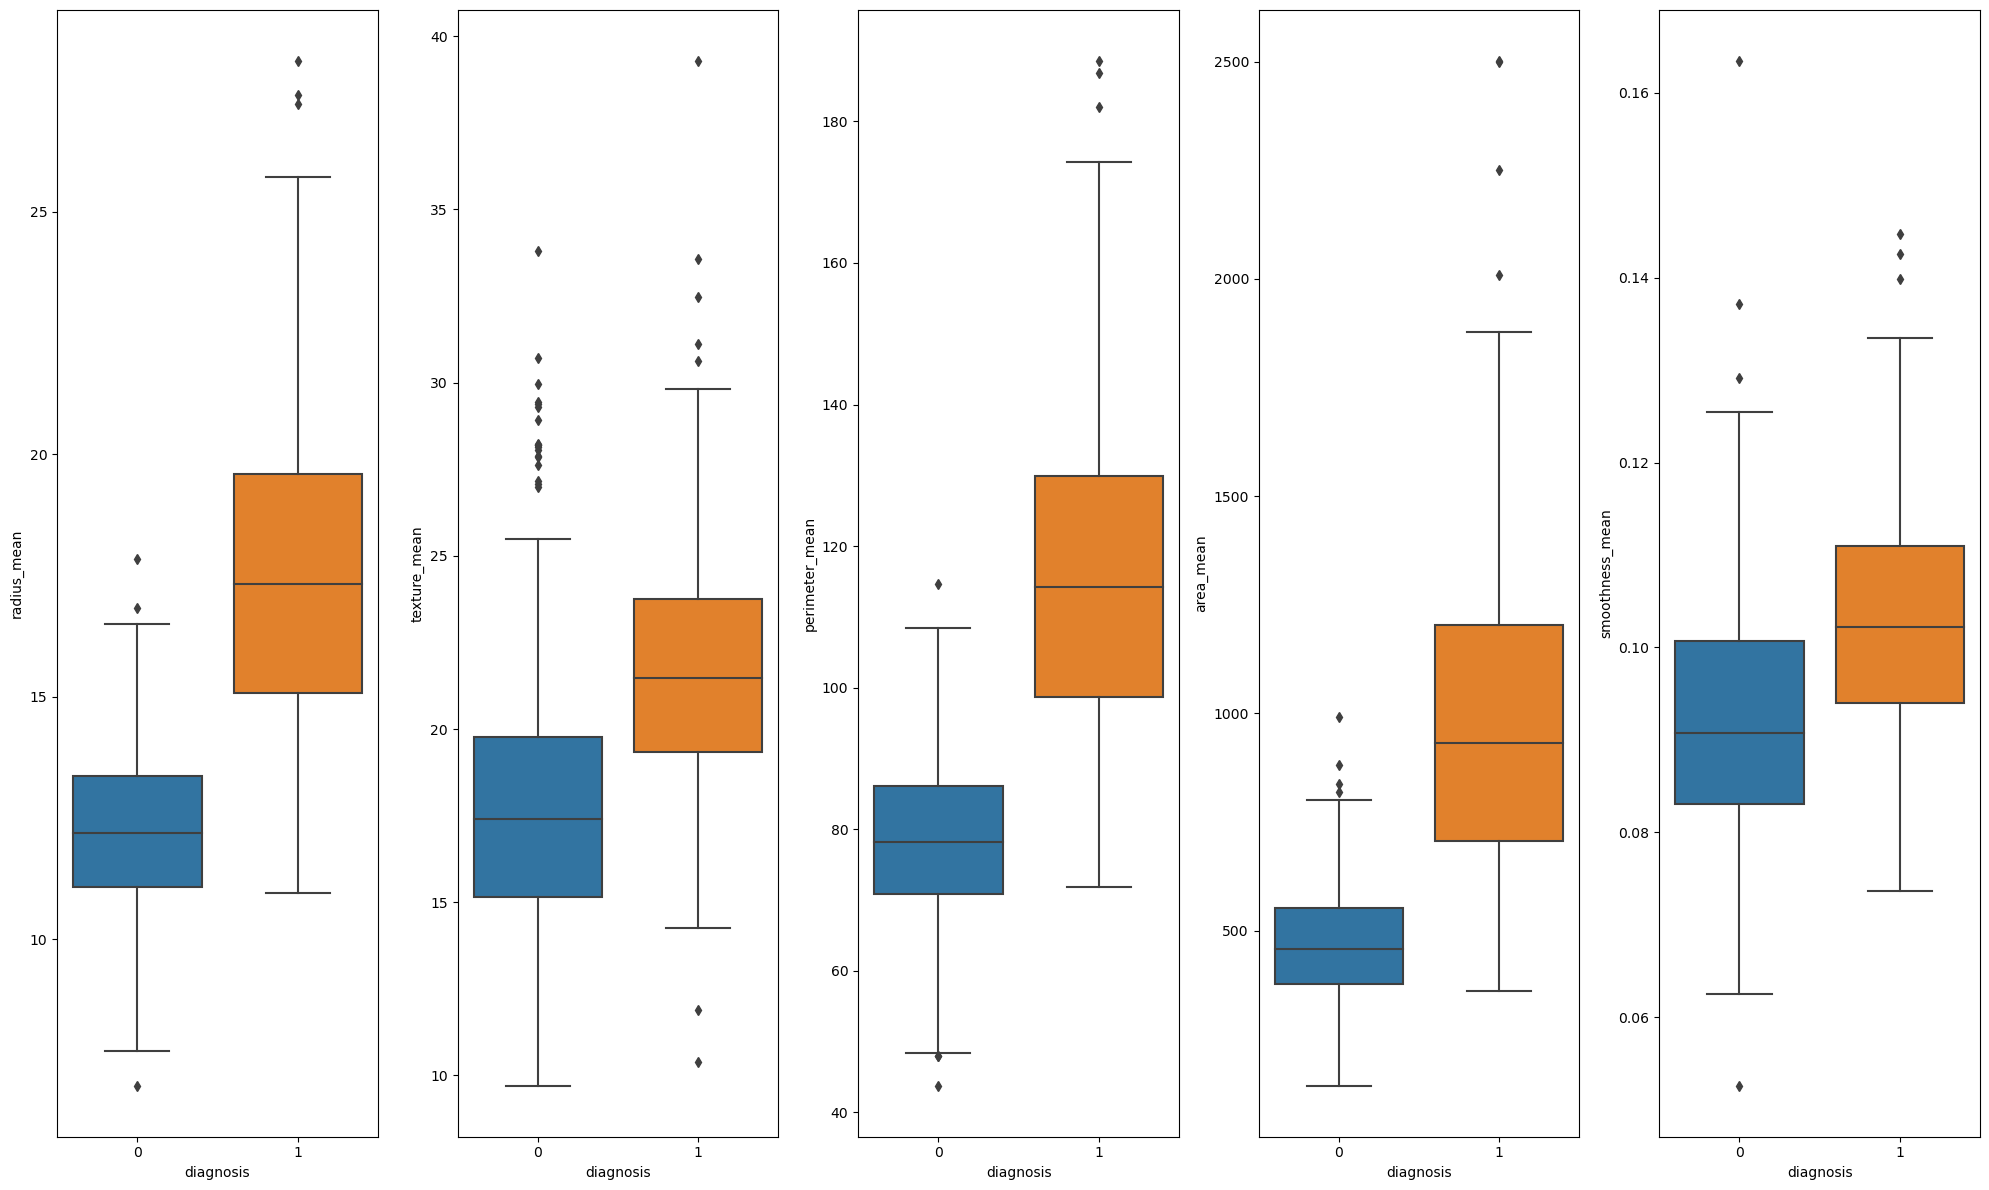

In [8]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5) 
sns.boxplot ( x= df['diagnosis'], y = df['radius_mean'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['texture_mean'], ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['perimeter_mean'], ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['area_mean'] , ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['smoothness_mean']  , ax = ax5)
f .tight_layout()


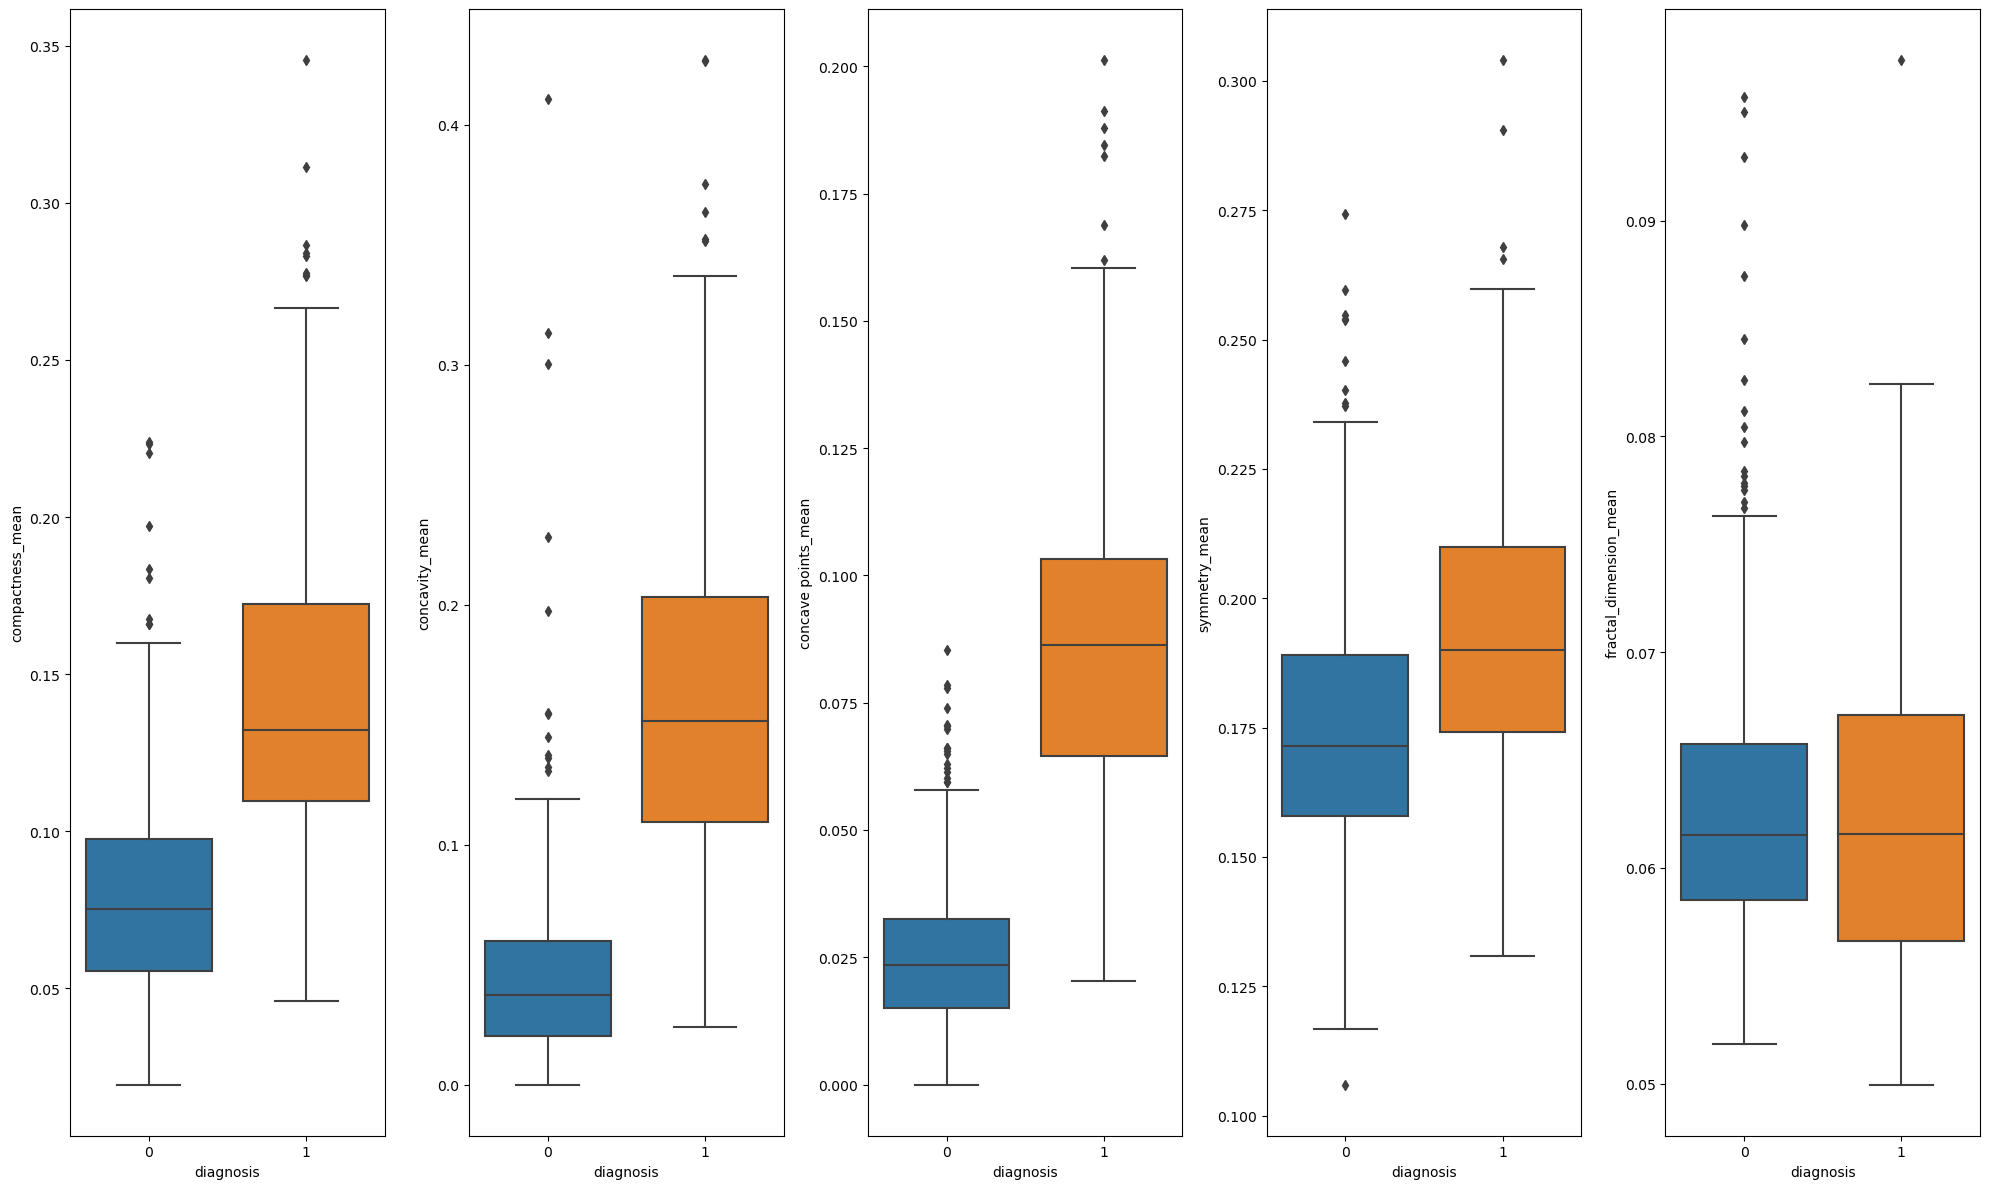

In [9]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['compactness_mean'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['concavity_mean'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['concave points_mean'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['symmetry_mean'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['fractal_dimension_mean'] , ax = ax5)
f .tight_layout()


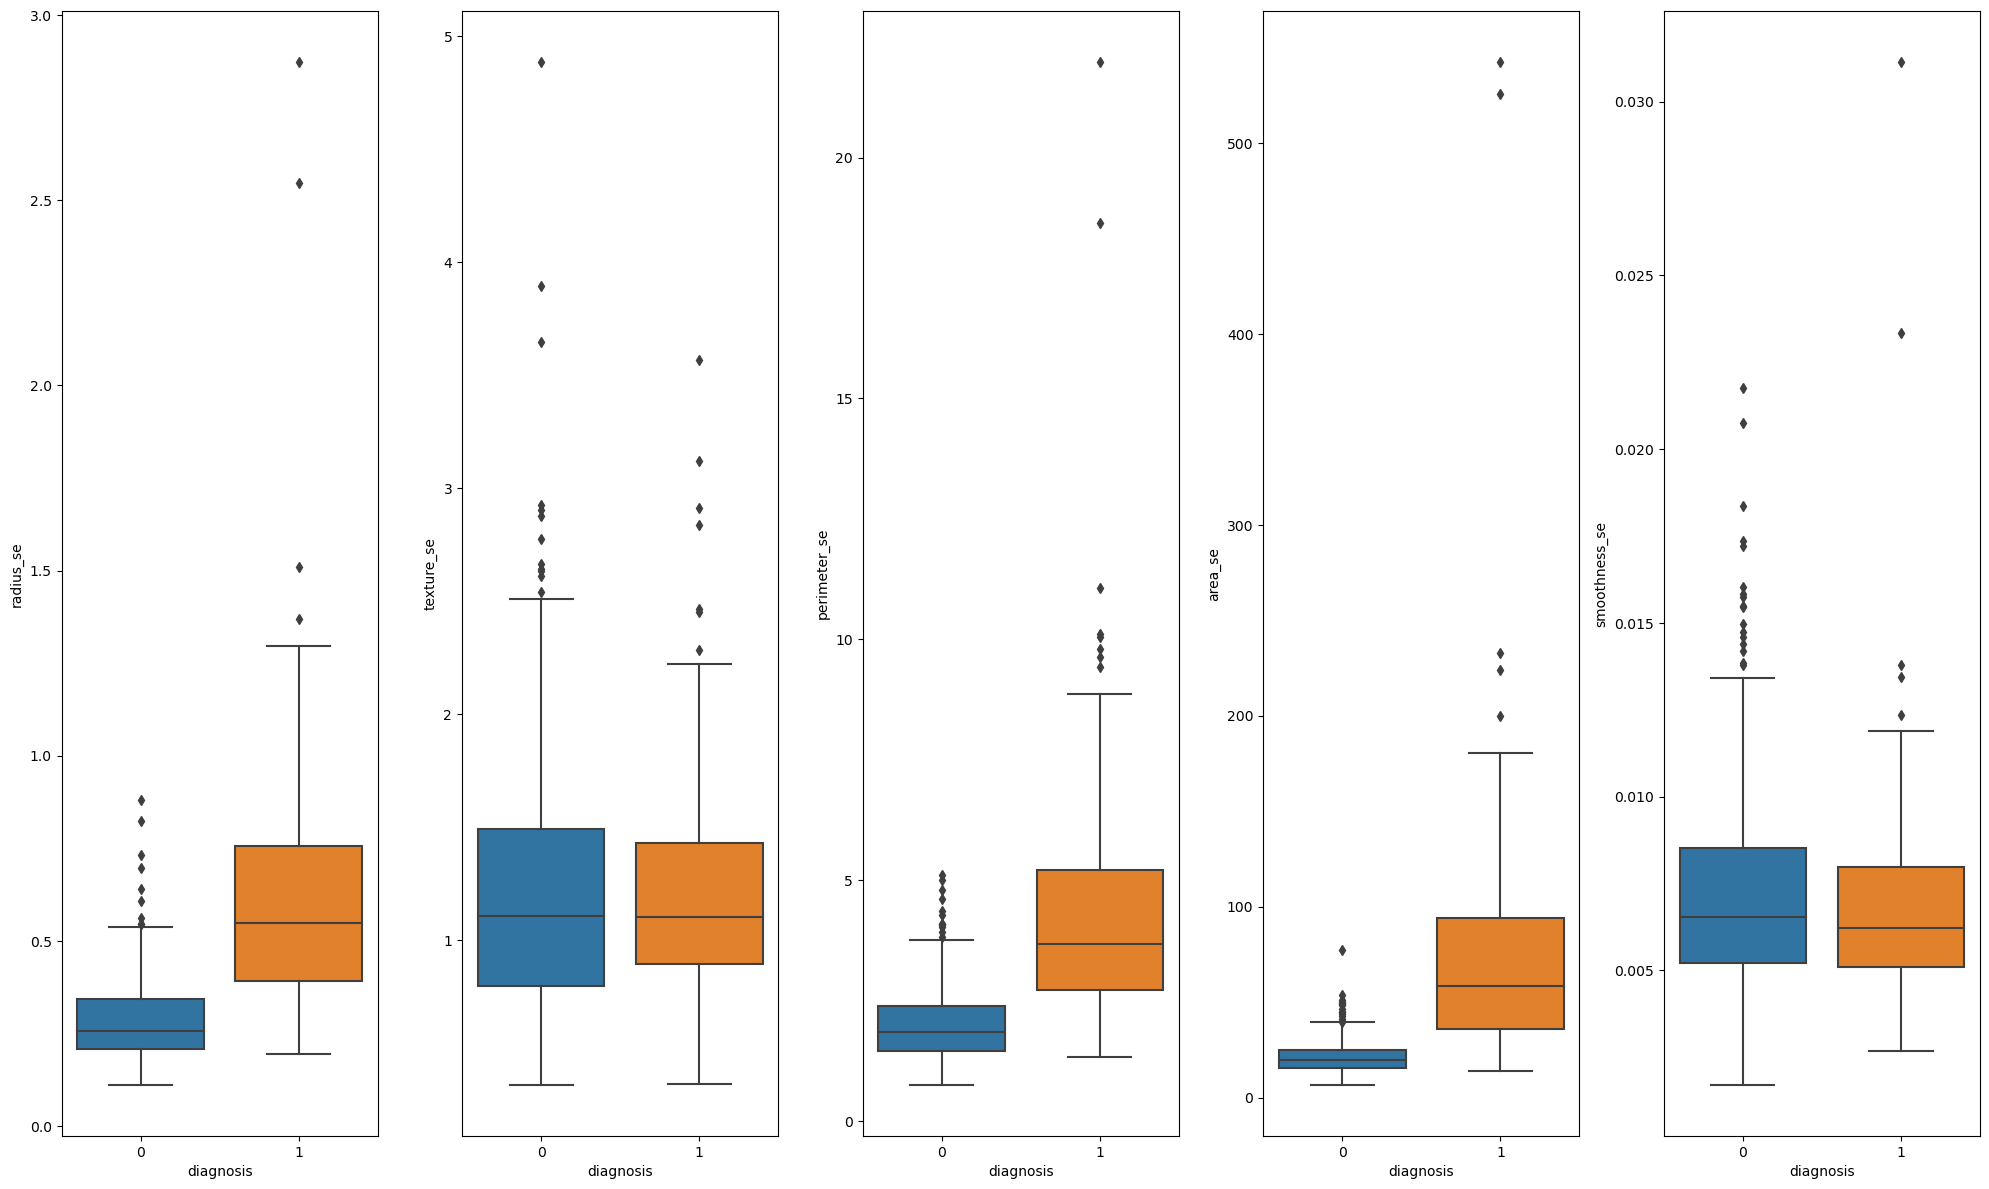

In [10]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['radius_se'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['texture_se'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['perimeter_se'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['area_se'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['smoothness_se'] , ax = ax5)
f .tight_layout()


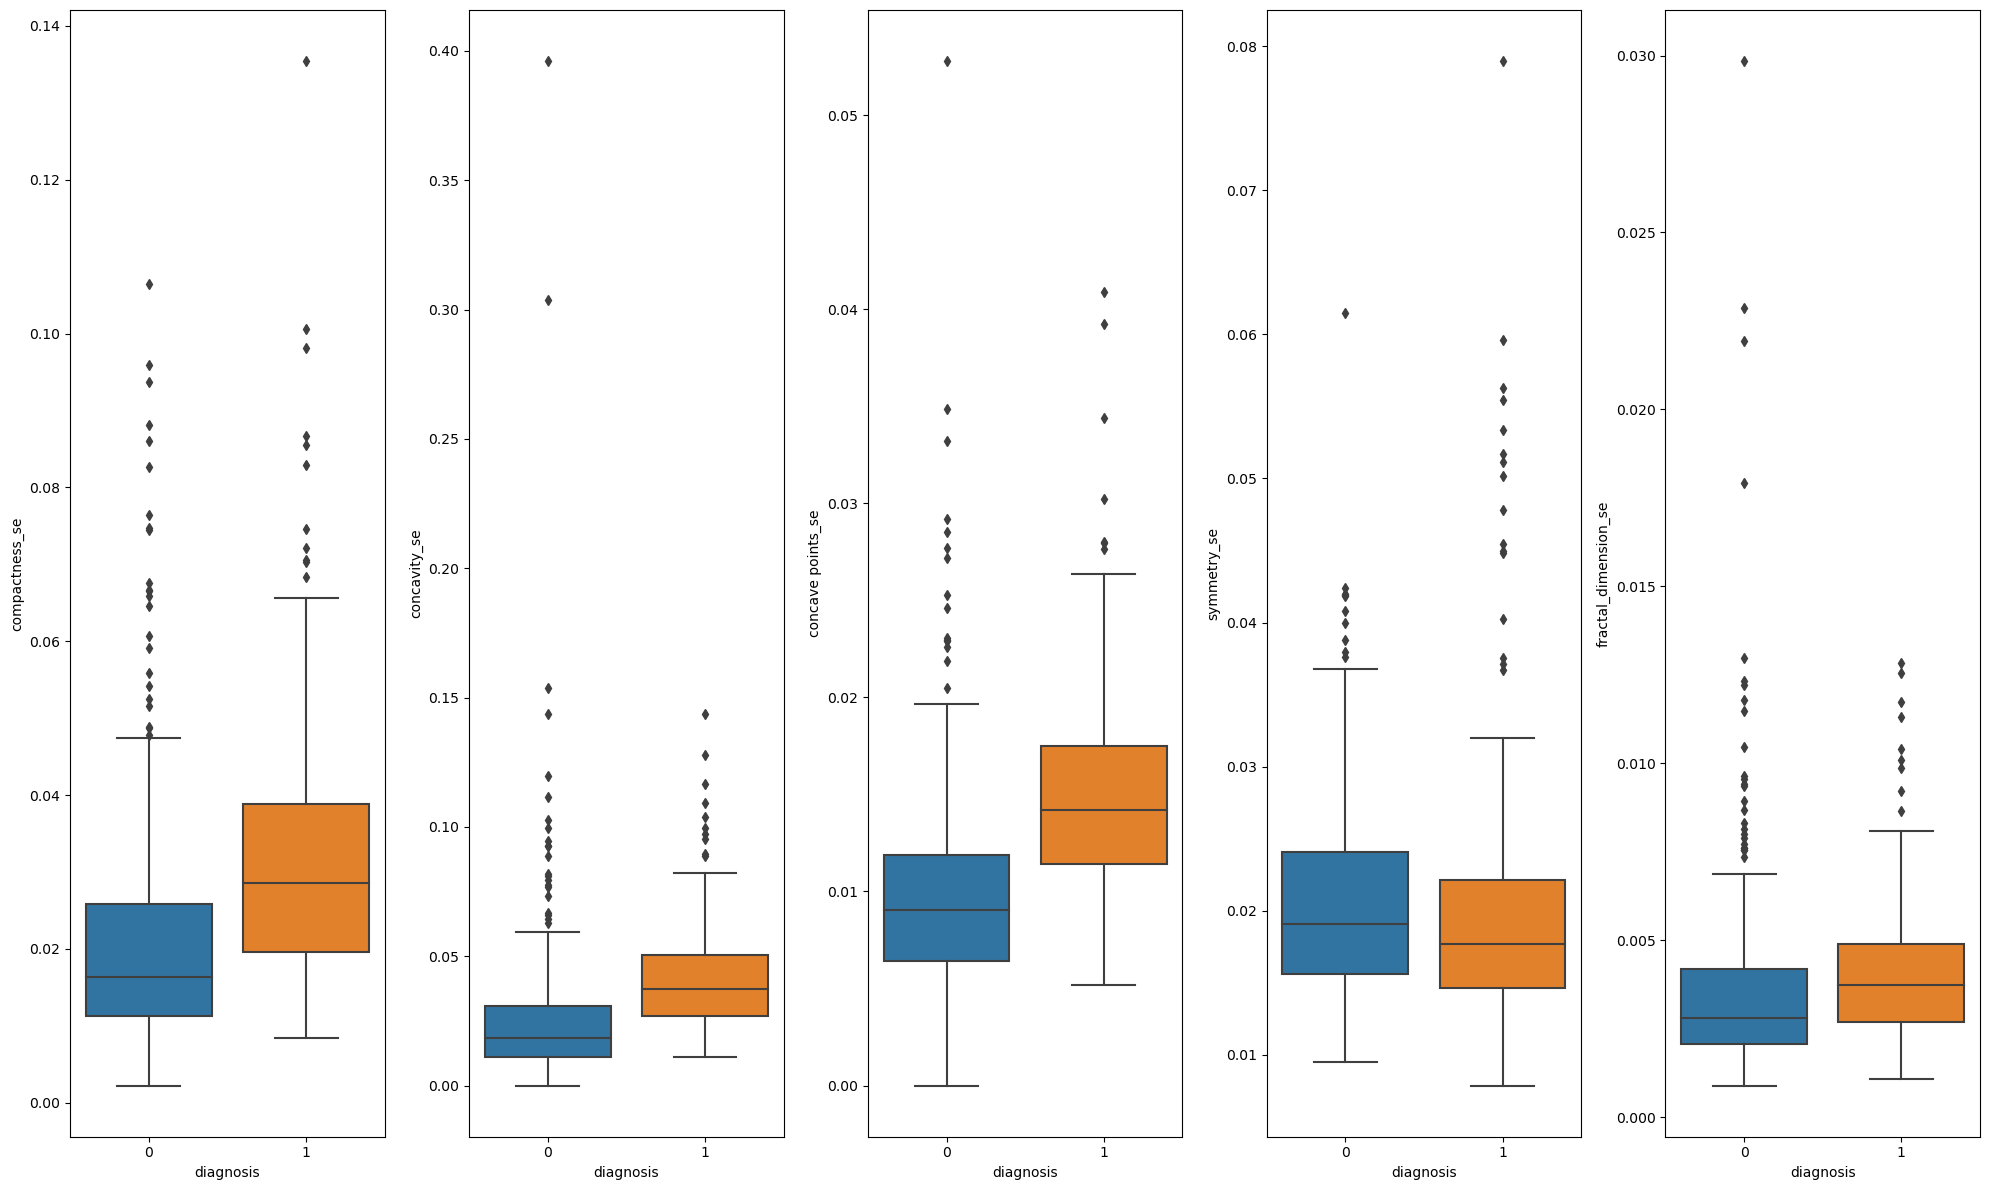

In [11]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['compactness_se'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['concavity_se'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['concave points_se'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df[ 'symmetry_se'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['fractal_dimension_se'] , ax = ax5)
f .tight_layout()


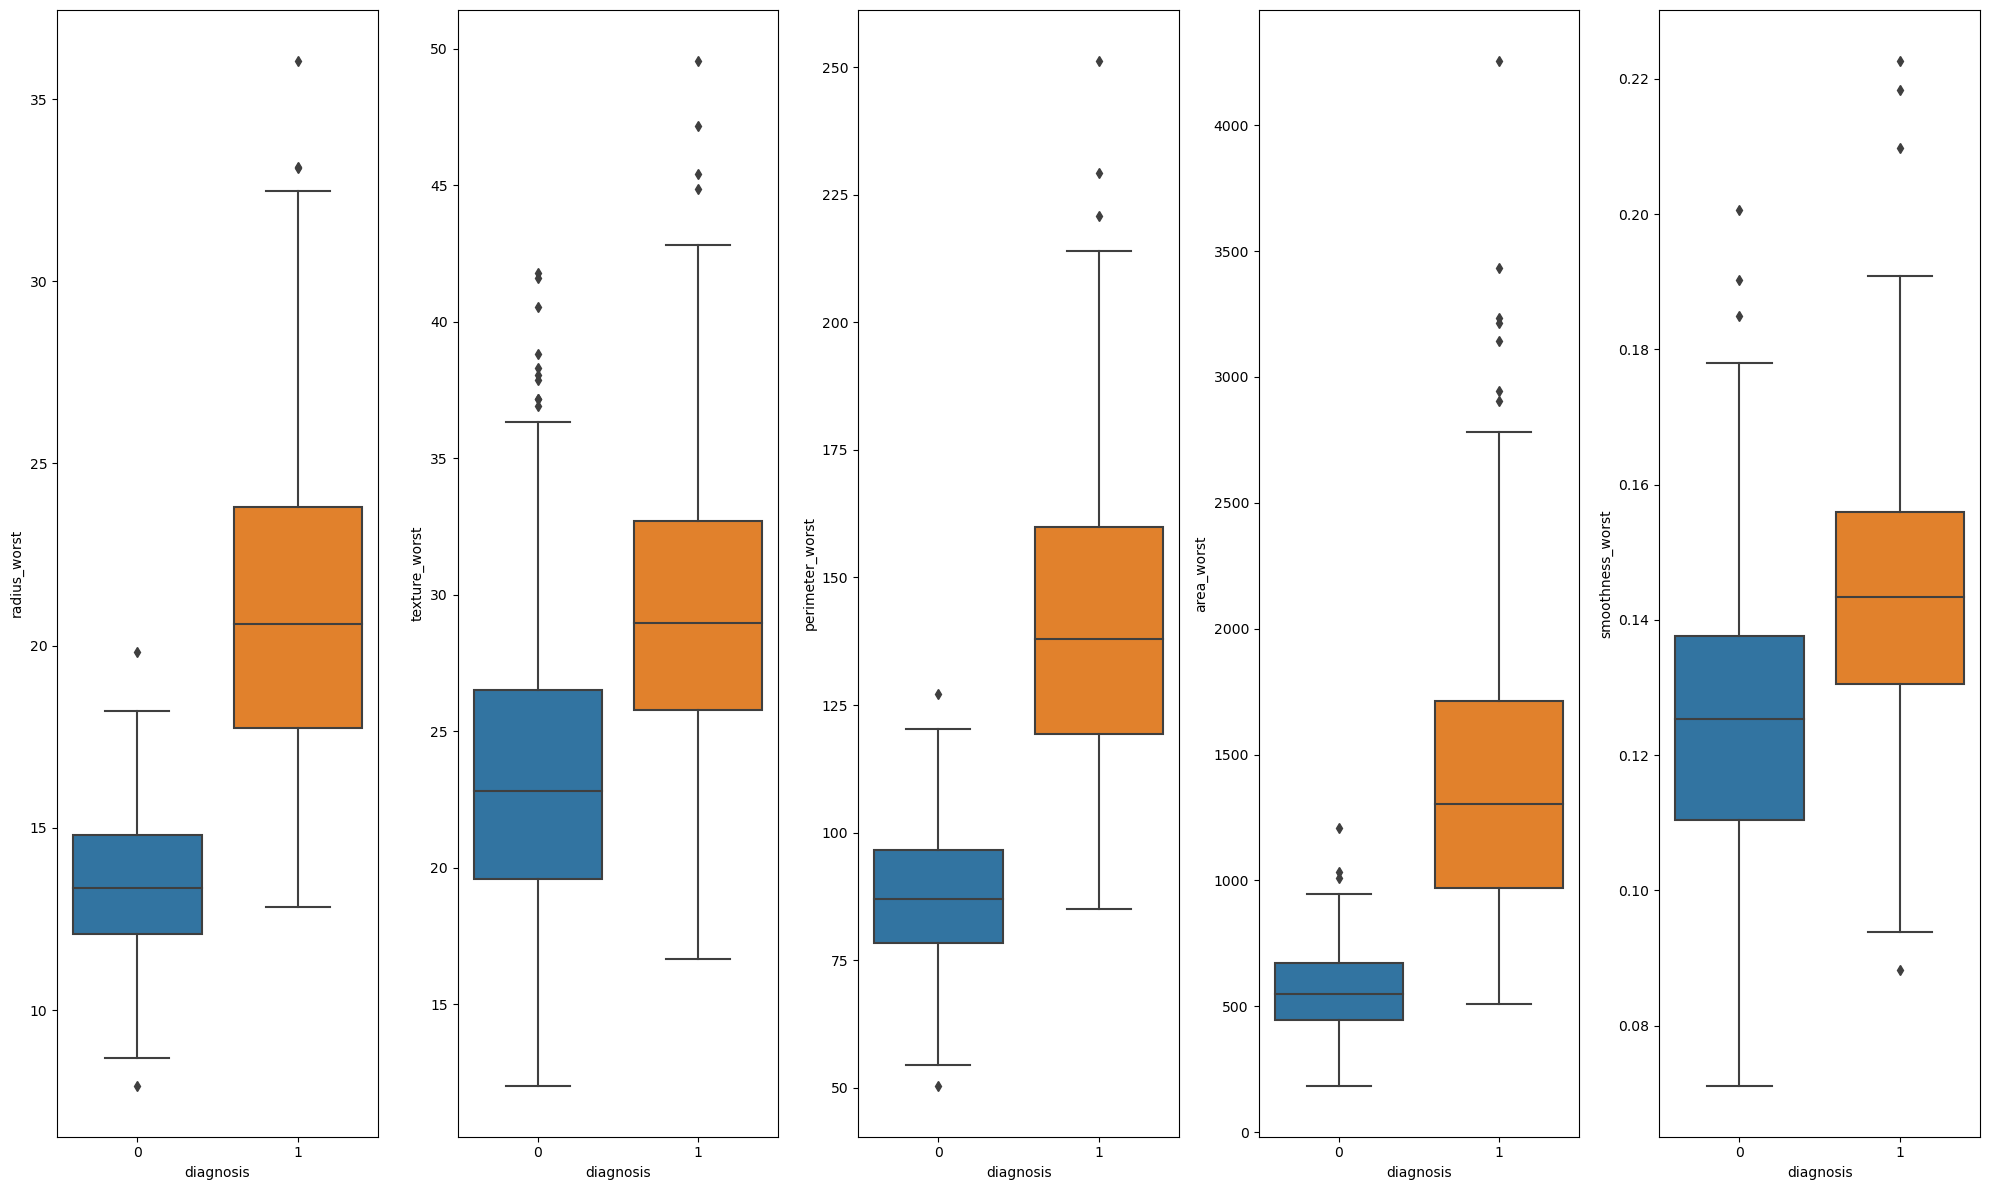

In [12]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['radius_worst'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['texture_worst'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['perimeter_worst'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df['area_worst'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['smoothness_worst'] , ax = ax5)
f .tight_layout()


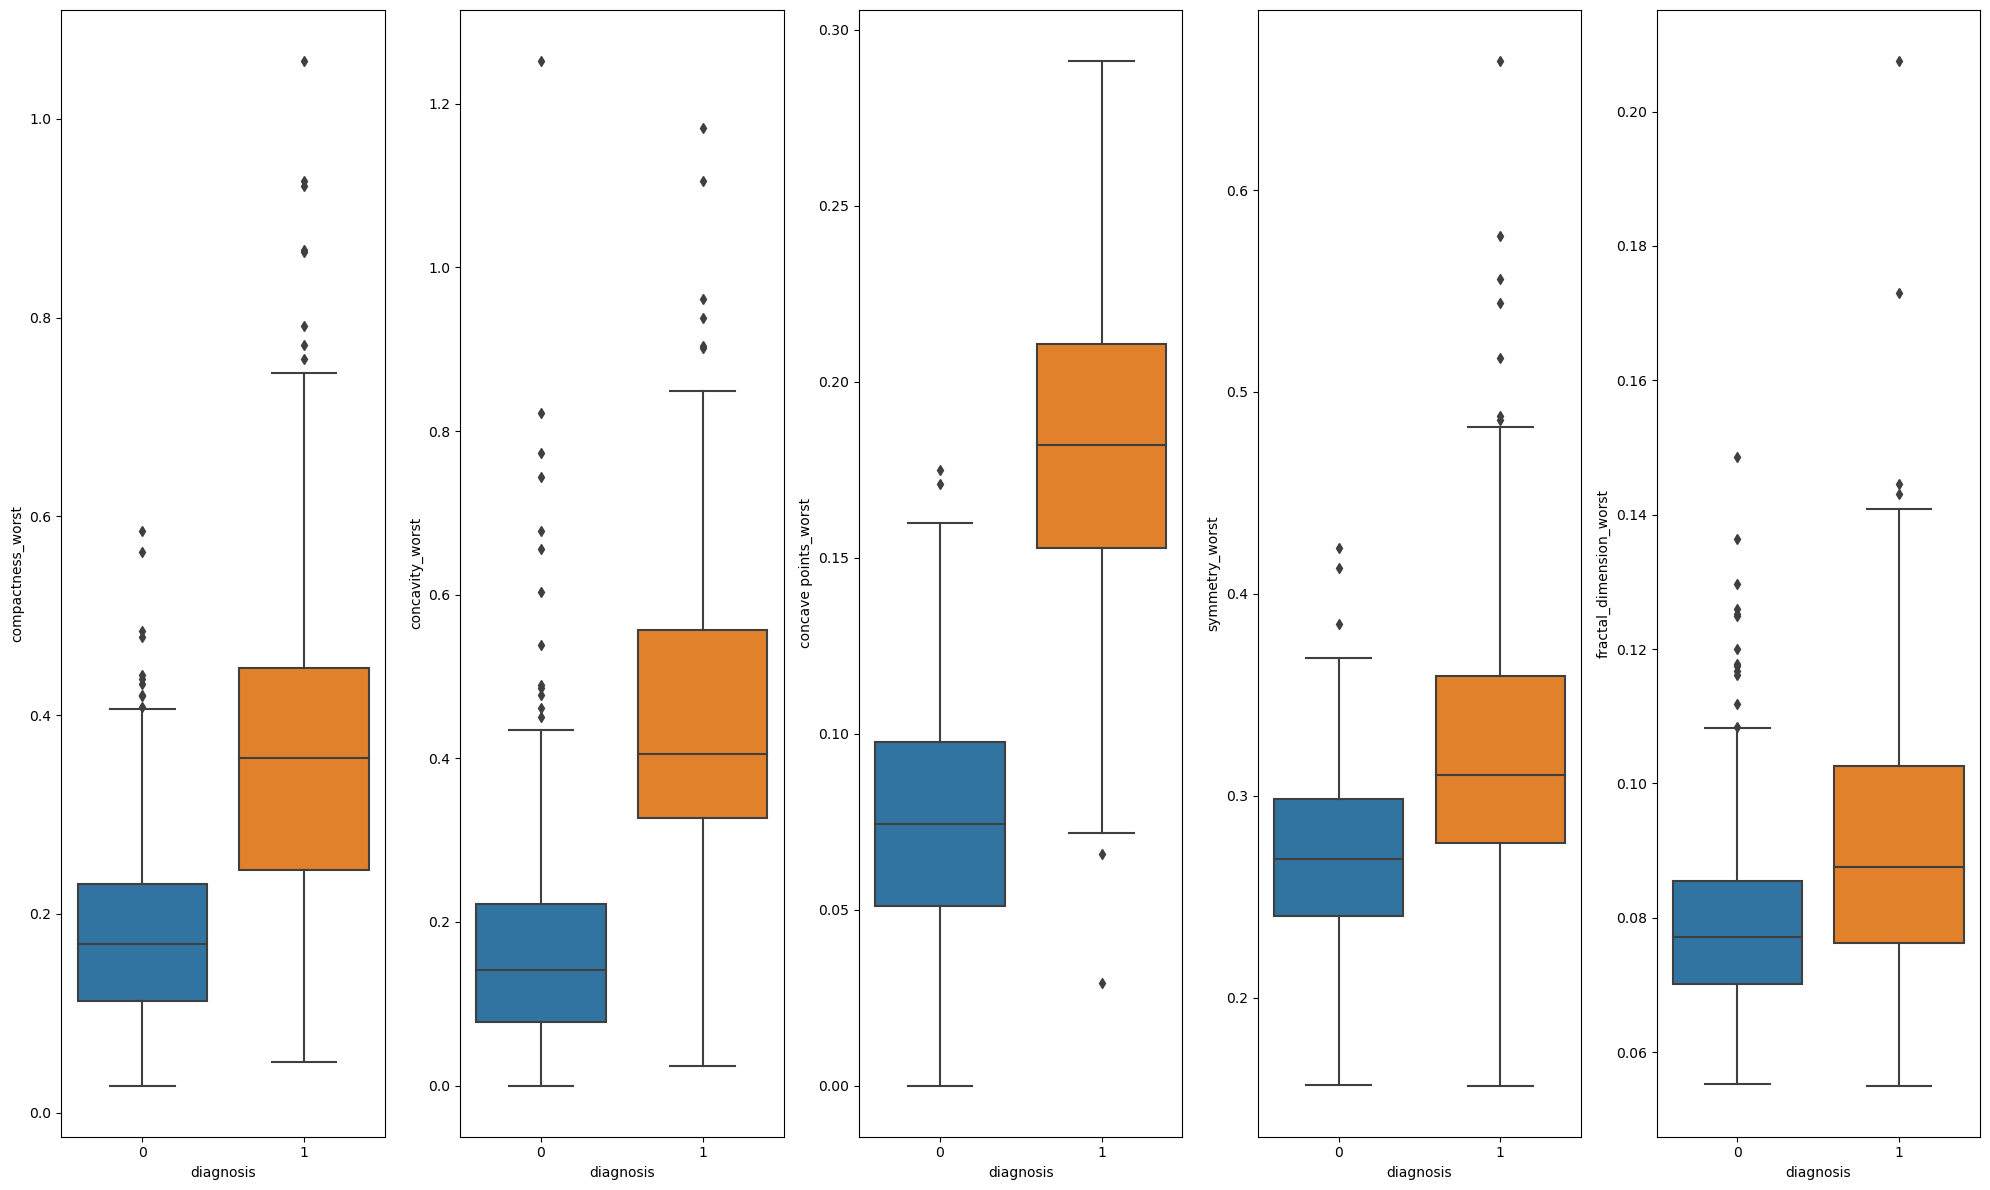

In [13]:
f, (ax1,ax2,ax3,ax4,ax5) = plt.subplots (1,5)
sns.boxplot (x= df['diagnosis'], y = df['compactness_worst'], ax = ax1)
sns.boxplot (x= df['diagnosis'], y = df['concavity_worst'] , ax = ax2)
sns.boxplot (x= df['diagnosis'], y = df['concave points_worst'] , ax = ax3)
sns.boxplot (x= df['diagnosis'], y = df[ 'symmetry_worst'], ax = ax4)
sns.boxplot (x= df['diagnosis'], y = df['fractal_dimension_worst'] , ax = ax5)
f .tight_layout()


"Visualizing the data distribution of all the columns in independent variable against the density distribution using Seaborn Distplot in the following 6 Cells.

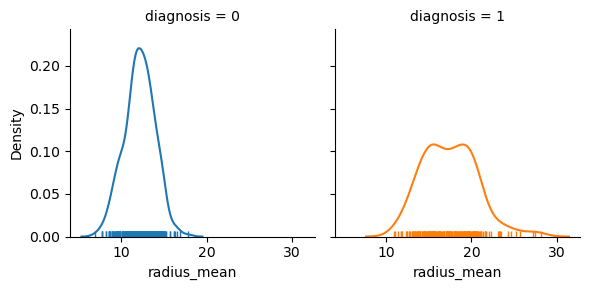

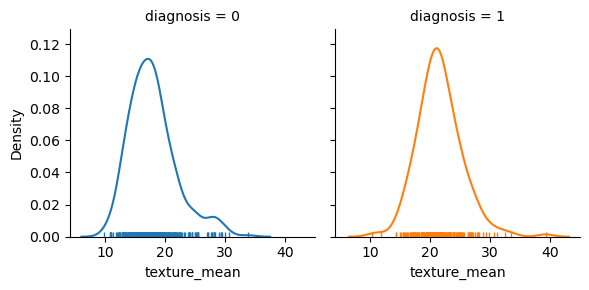

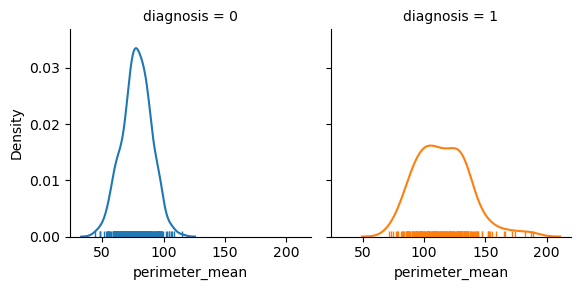

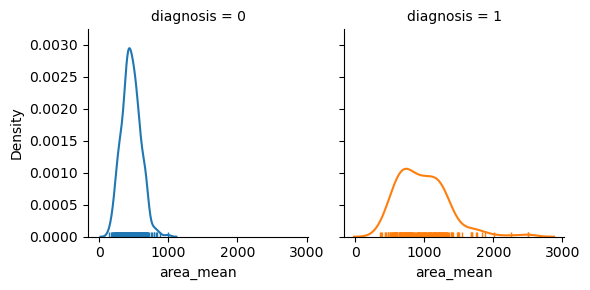

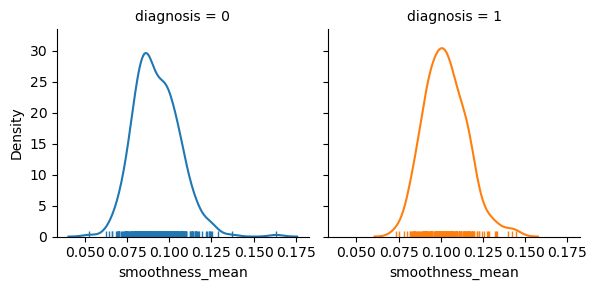

In [14]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "radius_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'texture_mean', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'perimeter_mean', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "area_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "smoothness_mean", hist = False, rug = True)
plt.show()

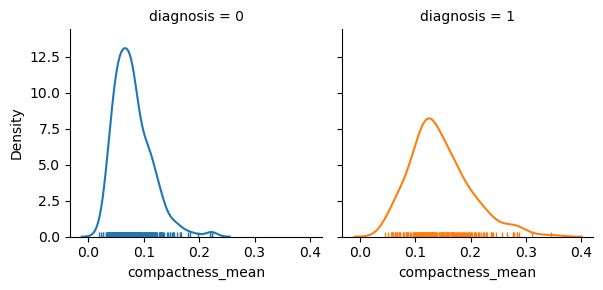

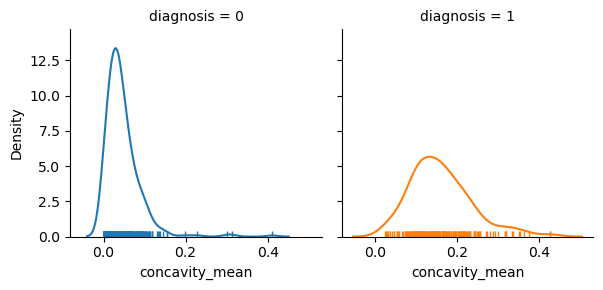

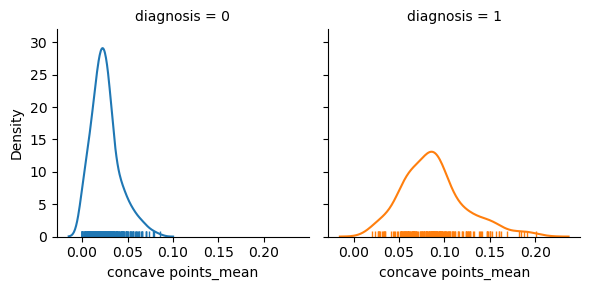

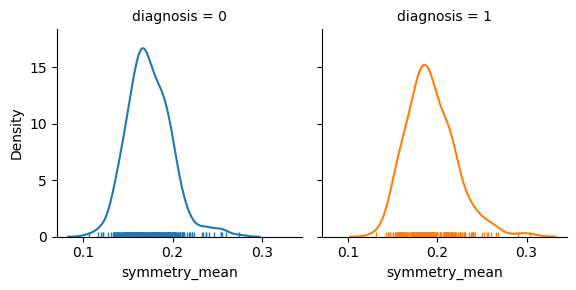

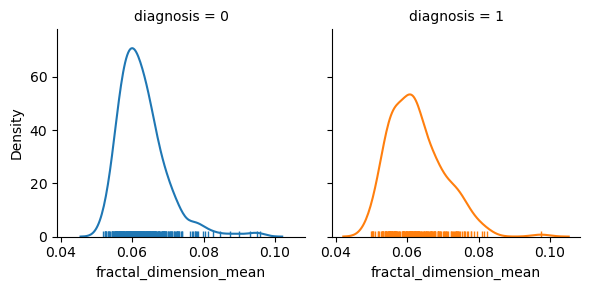

In [15]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "compactness_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concavity_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concave points_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "symmetry_mean", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "fractal_dimension_mean", hist = False, rug = True)
plt.show()


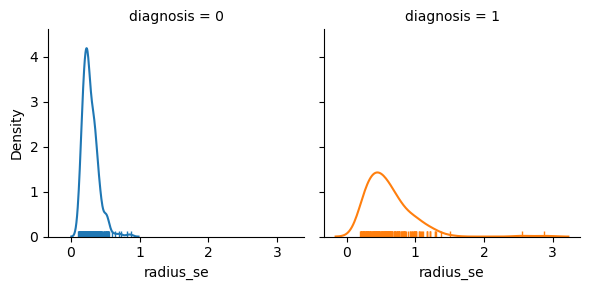

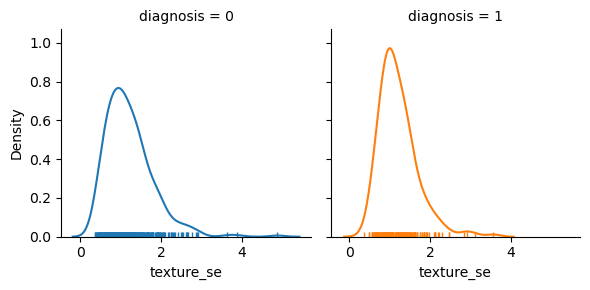

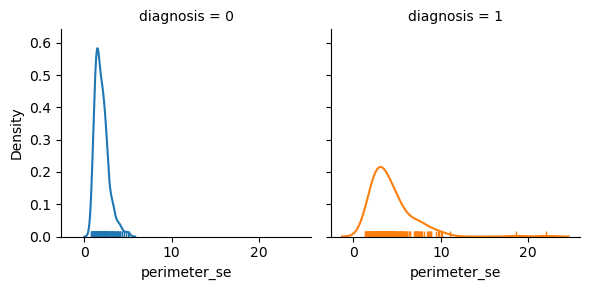

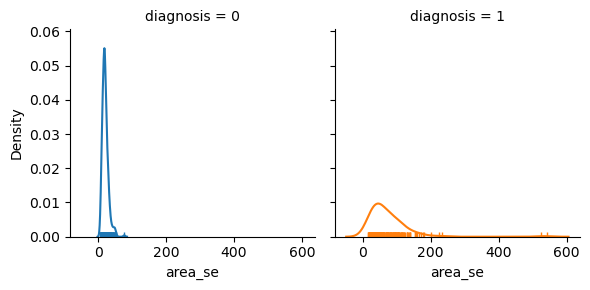

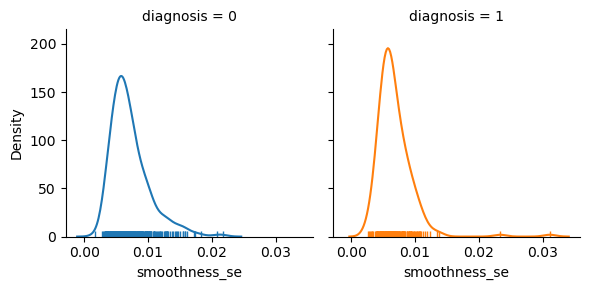

In [16]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "radius_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'texture_se', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'perimeter_se', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "area_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "smoothness_se", hist = False, rug = True)
plt.show()

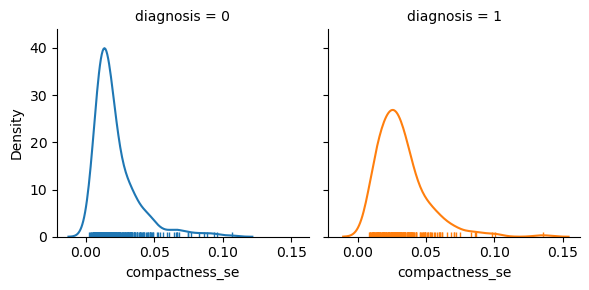

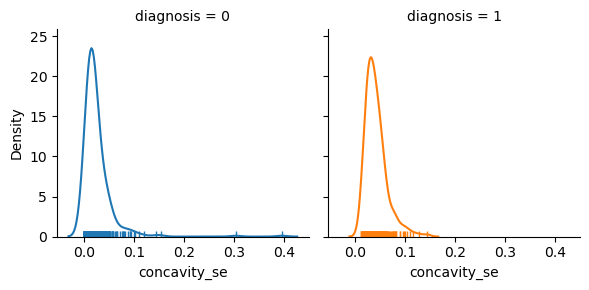

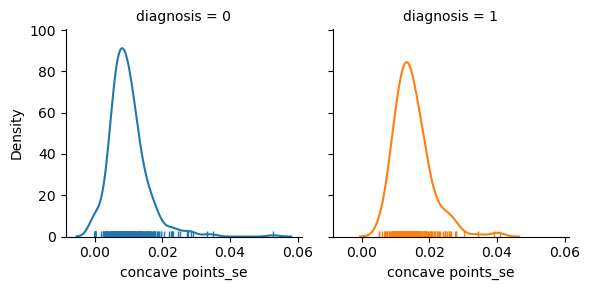

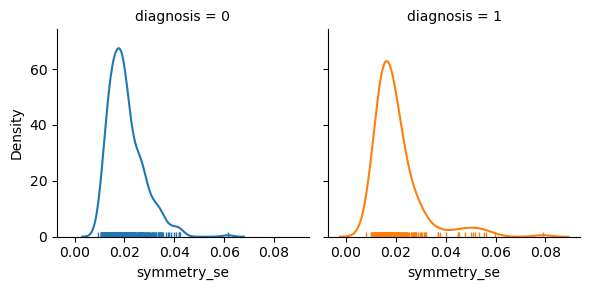

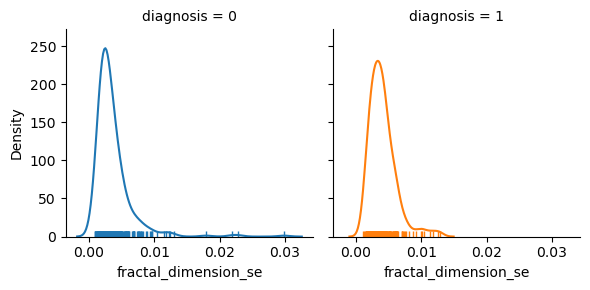

In [17]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "compactness_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concavity_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concave points_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "symmetry_se", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "fractal_dimension_se", hist = False, rug = True)
plt.show()


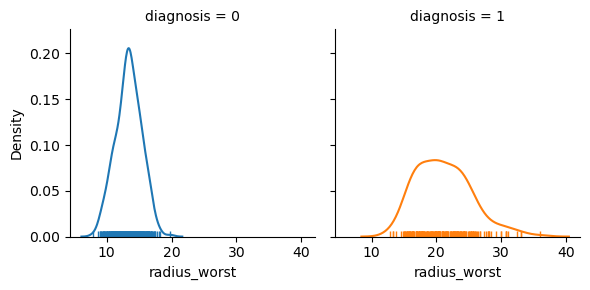

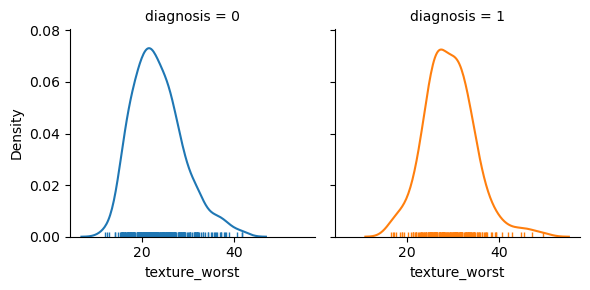

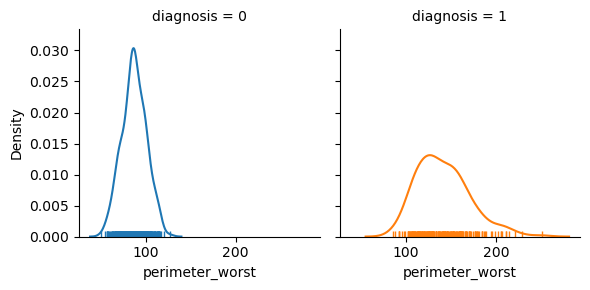

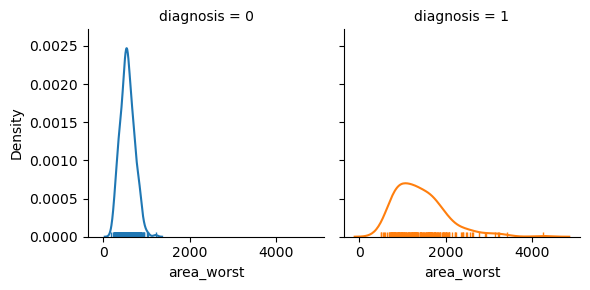

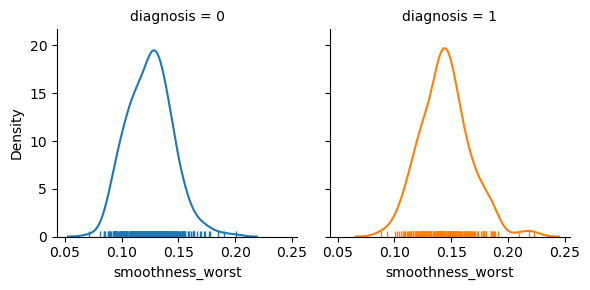

In [18]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "radius_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'texture_worst', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, 'perimeter_worst', hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "area_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "smoothness_worst", hist = False, rug = True)
plt.show()

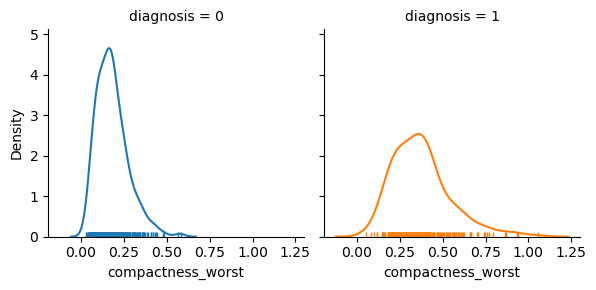

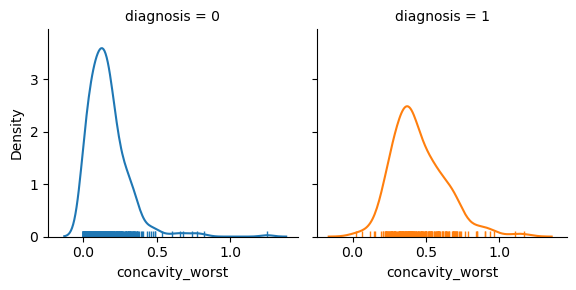

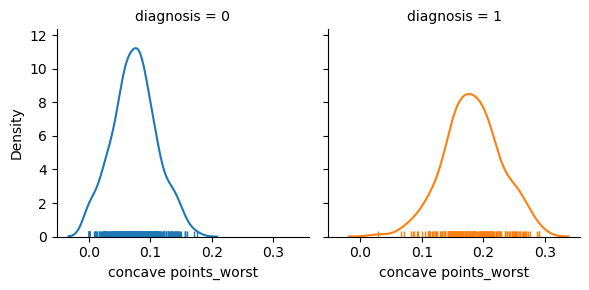

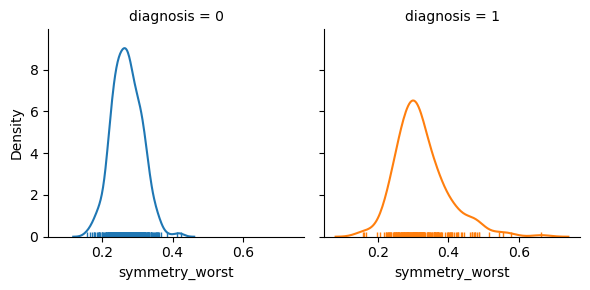

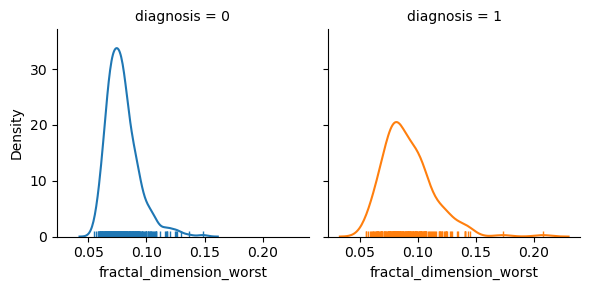

In [19]:
g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "compactness_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concavity_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "concave points_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "symmetry_worst", hist = False, rug = True)

g = sns.FacetGrid (df,col = 'diagnosis', hue = 'diagnosis')
g.map (sns.distplot, "fractal_dimension_worst", hist = False, rug = True)
plt.show()


"Defining the Function for the ML algorithms using GridSearchCV Algorithm and splitting the dependent variable & independent variable into training and test dataset and Predicting the Dependent Variable by fitting the given model and create the pickle file of the model with the given Algo_name. Further getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset." 

In [20]:
def FitModel (x,y, algo_name , algorithm, gridSearchParams, cv):
    np.random.seed(10)
    x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2)
    grid = GridSearchCV(estimator = algorithm, param_grid = gridSearchParams,
                        cv = cv, scoring = 'accuracy', verbose = 1 , n_jobs = -1 )
    grid_result = grid.fit(x_train, y_train)
    best_params = grid_result.best_params_
    pred = grid_result.predict (x_test)
    cm = confusion_matrix (y_test,pred) 
    pickle.dump(grid_result,open(algo_name,'wb'))
    print ('Best Params :', best_params)
    print ('\n Classification Report:',classification_report(y_test,pred))
    print ('\n Accuracy Score', (accuracy_score(y_test,pred)))
    print ('\n Confusion Matrix :\n',cm)


"Running the function with some appropriate parameters and fitting the Support Vector Machine Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name SVC." 

In [21]:
param = {'C': [0.1,1,100,1000],
        'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (x,y,'SVC',SVC(), param, cv =10)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Params : {'C': 1, 'gamma': 0.0001}

 Classification Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95        75
           1       0.90      0.90      0.90        39

    accuracy                           0.93       114
   macro avg       0.92      0.92      0.92       114
weighted avg       0.93      0.93      0.93       114


 Accuracy Score 0.9298245614035088

 Confusion Matrix :
 [[71  4]
 [ 4 35]]


"Running the function with some appropriate parameters and fitting the Random Forest Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name Random Forest."

In [22]:
param={'n_estimators':[100,200,300,500,1000,2000],
      'criterion':['entropy','gini']}
FitModel(x,y,'Random Forest',RandomForestClassifier(),param,cv=10)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Params : {'criterion': 'entropy', 'n_estimators': 2000}

 Classification Report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


 Accuracy Score 0.9736842105263158

 Confusion Matrix :
 [[73  2]
 [ 1 38]]


"Running the function with some appropriate parameters and fitting the XGBoost Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name XGBoost."

In [23]:
param = { 'n_estimators': [100,111,222,333,444,500,1000,2000]  }
FitModel (x,y,'XGBoost', XGBClassifier(),param, cv = 10)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Params : {'n_estimators': 111}

 Classification Report:               precision    recall  f1-score   support

           0       0.97      0.97      0.97        75
           1       0.95      0.95      0.95        39

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114


 Accuracy Score 0.9649122807017544

 Confusion Matrix :
 [[73  2]
 [ 2 37]]


"Resampling the dependent variable so that the dependent variable values get balanced and assigning the new name for resampled variable"

In [24]:
from imblearn.over_sampling import SMOTE
display (df['diagnosis'].value_counts())
sm = SMOTE(random_state =42)
x_res, y_res = sm.fit_resample (x, y)
display (y_res.value_counts())

0    357
1    212
Name: diagnosis, dtype: int64

1    357
0    357
Name: diagnosis, dtype: int64

"Running the function with some appropriate parameters with the resampled variables and fitting the Random Forest Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name Random Forest get updated."

In [25]:
param={'n_estimators':[100,200,300,500,1000,2000],
      'criterion':['entropy','gini']}
FitModel(x_res,y_res,'Random Forest',RandomForestClassifier(),param,cv=10)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
Best Params : {'criterion': 'entropy', 'n_estimators': 100}

 Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


 Accuracy Score 0.993006993006993

 Confusion Matrix :
 [[67  1]
 [ 0 75]]


"Running the function with some appropriate parameters with the resampled variables and fitting the Support Vector Machine Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name SVC get updated."

In [26]:
param = {'C': [0.1,1,100,1000],
        'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (x_res,y_res,'SVC',SVC(), param, cv =10)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
Best Params : {'C': 100, 'gamma': 0.0001}

 Classification Report:               precision    recall  f1-score   support

           0       0.97      0.94      0.96        68
           1       0.95      0.97      0.96        75

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143


 Accuracy Score 0.958041958041958

 Confusion Matrix :
 [[64  4]
 [ 2 73]]


"Running the function with some appropriate parameters with the resampled variables and fitting the XGBoost Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name XGBoost get updated."

In [27]:
param = { 'n_estimators': [100,111,222,333,444,500,1000,2000]  }
FitModel (x_res,y_res,'XGBoost', XGBClassifier(),param, cv = 10)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
Best Params : {'n_estimators': 222}

 Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143


 Accuracy Score 0.986013986013986

 Confusion Matrix :
 [[66  2]
 [ 0 75]]


"Fitting the Random Forest Classifiers model with the original dependent and independent variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset."

In [28]:
np.random.seed(10)
x_train,x_test, y_train,y_test = train_test_split (x,y,test_size = 0.2)
forest = RandomForestClassifier (n_estimators = 500)
fit = forest.fit (x_train, y_train)
accuracy = fit.score(x_test,y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix (y_test, predict)
print ('Classification Report:',classification_report(y_test,predict))
print ('Accuracy Score', (accuracy_score(y_test,predict)))
print ('Accuracy of Random Forest ', (accuracy))
print ('Confusion Matrix :\n',cmatrix)


Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        75
           1       0.95      1.00      0.97        39

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114

Accuracy Score 0.9824561403508771
Accuracy of Random Forest  0.9824561403508771
Confusion Matrix :
 [[73  2]
 [ 0 39]]


"Finding the feature importances of all the columns in the independent variable with respect to Random Forest Classification Model above predicted for the dimensional reduction process"

In [29]:
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))

Feature Ranking:
Feature radius_mean (0.139416)
Feature texture_mean (0.137679)
Feature perimeter_mean (0.118768)
Feature area_mean (0.117989)
Feature smoothness_mean (0.077427)
Feature compactness_mean (0.057240)
Feature concavity_mean (0.048971)
Feature concave points_mean (0.045257)
Feature symmetry_mean (0.035983)
Feature fractal_dimension_mean (0.033661)
Feature radius_se (0.030638)
Feature texture_se (0.017393)
Feature perimeter_se (0.015467)
Feature area_se (0.014069)
Feature smoothness_se (0.013795)
Feature compactness_se (0.011398)
Feature concavity_se (0.011063)
Feature concave points_se (0.010804)
Feature symmetry_se (0.008930)
Feature fractal_dimension_se (0.008089)
Feature radius_worst (0.006387)
Feature texture_worst (0.005603)
Feature perimeter_worst (0.005135)
Feature area_worst (0.004920)
Feature smoothness_worst (0.004529)
Feature compactness_worst (0.004402)
Feature concavity_worst (0.004330)
Feature concave points_worst (0.003980)
Feature symmetry_worst (0.003718)
F

"Fitting the Random Forest Classifiers model with the resampled dependent and independent variable and getting the Accuracy Score, Classification Report and Confusion Matrix between the predicted value and dependent test dataset."

In [30]:
np.random.seed(10)
x_train,x_test, y_train,y_test = train_test_split (x_res,y_res,test_size = 0.2)
forest1 = RandomForestClassifier (n_estimators = 500)
fit = forest1.fit (x_train, y_train)
accuracy = fit.score(x_test,y_test)
predict = fit.predict(x_test)
cmatrix = confusion_matrix (y_test, predict)
print ('Classification Report:',classification_report(y_test,predict))
print ('Accuracy Score', (accuracy_score(y_test,predict)))
print ('Accuracy of Random Forest ', (accuracy))
print ('Confusion Matrix :\n',cmatrix)


Classification Report:               precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Accuracy Score 0.986013986013986
Accuracy of Random Forest  0.986013986013986
Confusion Matrix :
 [[66  2]
 [ 0 75]]


"Finding the feature importances of all the columns in the independent variable with respect to Random Forest Classification Model fitted with resampled variable in above cell for the dimensional reduction process"

In [31]:
importances = forest1.feature_importances_
indices = np.argsort(importances)[::-1]
print ("Feature Ranking:")
for f in range (x.shape[1]):
    print ("Feature %s (%f)"  %(list (x)[f],importances[indices[f]]))

Feature Ranking:
Feature radius_mean (0.129423)
Feature texture_mean (0.128205)
Feature perimeter_mean (0.111420)
Feature area_mean (0.105380)
Feature smoothness_mean (0.085886)
Feature compactness_mean (0.048903)
Feature concavity_mean (0.044122)
Feature concave points_mean (0.043117)
Feature symmetry_mean (0.042778)
Feature fractal_dimension_mean (0.039242)
Feature radius_se (0.030374)
Feature texture_se (0.028608)
Feature perimeter_se (0.018527)
Feature area_se (0.017180)
Feature smoothness_se (0.016024)
Feature compactness_se (0.013380)
Feature concavity_se (0.013205)
Feature concave points_se (0.011923)
Feature symmetry_se (0.009251)
Feature fractal_dimension_se (0.008305)
Feature radius_worst (0.007106)
Feature texture_worst (0.006150)
Feature perimeter_worst (0.005986)
Feature area_worst (0.005982)
Feature smoothness_worst (0.005722)
Feature compactness_worst (0.005442)
Feature concavity_worst (0.005270)
Feature concave points_worst (0.004703)
Feature symmetry_worst (0.004286)
F

"Plotting the Bar Graph to represent the Feature Importances of the Independent variable column and saving the PNG file."

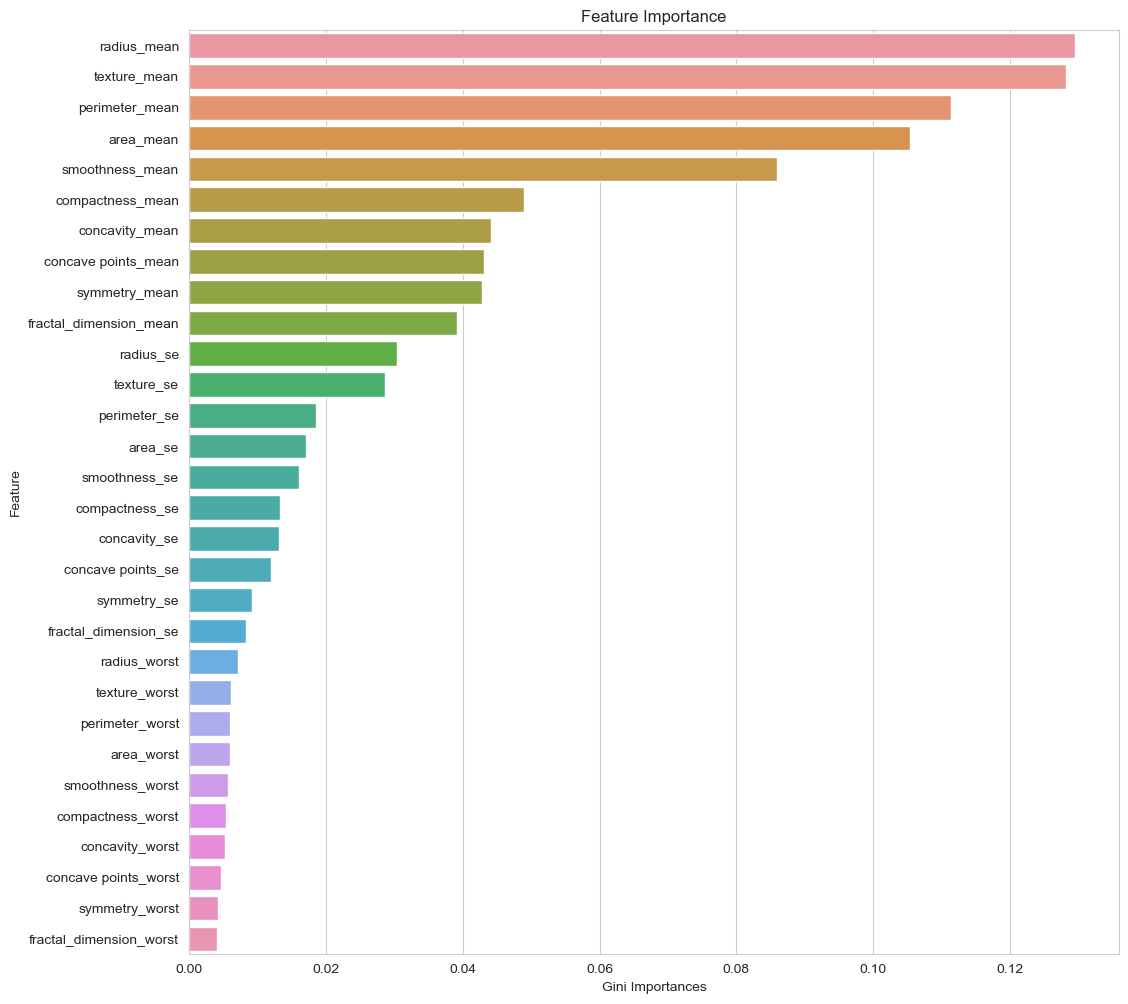

In [32]:
feat_imp = pd.DataFrame({'Feature': list(x), 'Gini importance': importances[indices]})
plt.rcParams['figure.figsize']= (12,12)
sns.set_style ('whitegrid')
ax= sns.barplot(x ='Gini importance', y = 'Feature', data = feat_imp  )
ax.set (xlabel = 'Gini Importances')
plt.title('Feature Importance')
plt.savefig('Feature Importance Horizontal.png')
plt.show()



"Plotting the Bar Graph to represent the Feature Importances of the Independent variable column and saving the PNG file."

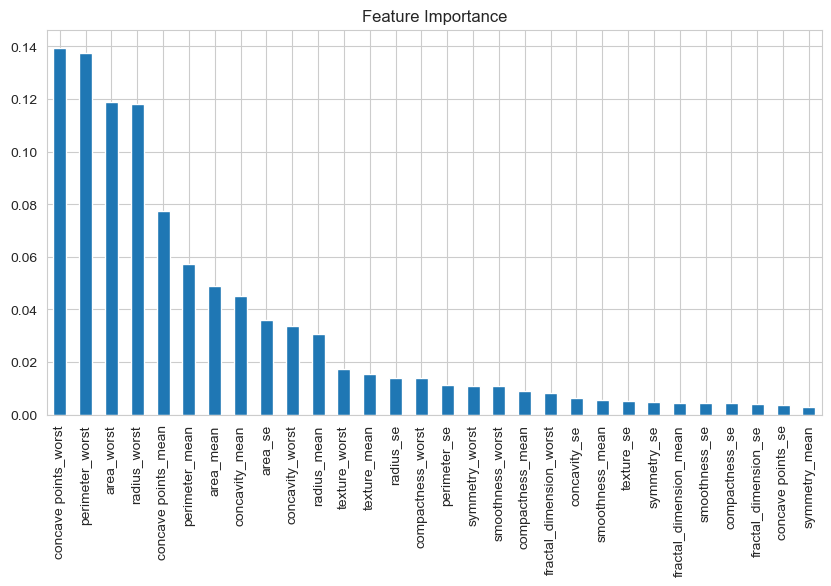

In [33]:
pd.Series(forest.feature_importances_,index=x.columns).sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.title('Feature Importance')
plt.savefig('Feature Importance Vertical.png')
plt.show()

"With respect to feature Importance of the independent variable reducing the dimensions of independent variable for reducing the complexity of model fitting."

In [34]:
feat_imp.index = feat_imp.Feature
feat_to_keep = feat_imp.iloc[:15].index
display (type(feat_to_keep),feat_to_keep)


pandas.core.indexes.base.Index

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se'],
      dtype='object', name='Feature')

"Passing the Resampled variable after dimensional reduction and Running the function with some appropriate parameters and fitting the Random Forest Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name Random Forest_resample."

In [35]:
X_res = pd.DataFrame(x_res)
Y_res = pd.DataFrame(y_res)
X_res.columns = x.columns
param = { 'n_estimators': [100,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res ,'Random Forest_resample',RandomForestClassifier(), param, cv =10)


Fitting 10 folds for each of 4 candidates, totalling 40 fits
Best Params : {'n_estimators': 100}

 Classification Report:               precision    recall  f1-score   support

           0       0.99      0.97      0.98        68
           1       0.97      0.99      0.98        75

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143


 Accuracy Score 0.9790209790209791

 Confusion Matrix :
 [[66  2]
 [ 1 74]]


"Passing the Resampled variable after dimensional reduction and Running the function with some appropriate parameters and fitting the Support Vector Machine Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name SVC_resample."

In [36]:
param = { 'C': [0.1,1,100,1000],
        'gamma':[0.0001,0.001, 0.005, 0.1,1, 3,5,10, 100]
         }
FitModel (X_res [feat_to_keep], Y_res,'SVC_resample',SVC(), param, cv =5)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Params : {'C': 1000, 'gamma': 0.0001}

 Classification Report:               precision    recall  f1-score   support

           0       0.94      0.94      0.94        68
           1       0.95      0.95      0.95        75

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143


 Accuracy Score 0.9440559440559441

 Confusion Matrix :
 [[64  4]
 [ 4 71]]


"Passing the Resampled variable after dimensional reduction and Running the function with some appropriate parameters and fitting the XGBoost Classifiers Algorithm and getting the Best Parameters of the algorithm, Accuracy Score, Classification Report and Confusion Matrix between the predicted values and dependent test dataset and also the pickle file with the name XGBoost_resample."

In [37]:
param = { 'n_estimators': [100,111,222,333,444,500,1000,2000]  }
FitModel (X_res [feat_to_keep], Y_res,'XGBoost_resample', XGBClassifier(),param, cv = 5)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Params : {'n_estimators': 100}

 Classification Report:               precision    recall  f1-score   support

           0       0.98      0.96      0.97        68
           1       0.96      0.99      0.97        75

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143


 Accuracy Score 0.972027972027972

 Confusion Matrix :
 [[65  3]
 [ 1 74]]


"Loading the pickle file with the algorithm which gives highest accuracy score" 

In [38]:
model =pickle.load(open("Random Forest","rb"))

"Predicting the independent variable using the loaded pickle file and getting the accuracy score and best parameters of the loaded pickle file."

In [39]:
pred1 = model.predict (x_test)
print (accuracy_score (pred1,y_test))
print(model.best_params_)

0.993006993006993
{'criterion': 'entropy', 'n_estimators': 100}
